# Data wrangling

In [1]:
!pip3 install opencv-python-headless==4.5.3.56


Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv-python-headless-4.5.3.56.tar.gz (89.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [1071 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and 

In [1]:
# Standard library imports
import glob
import shutil
from pathlib import Path

# PyPI imports
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import cv2 

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

# 1. Data download

In [2]:
%%time

# Download latest version
path=kagglehub.dataset_download("paultimothymooney/breast-histopathology-images")

print(f'Path to dataset files: {path}\n')

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1

CPU times: user 209 ms, sys: 150 ms, total: 359 ms
Wall time: 1.43 s


# 2. Data re-structuring

Right now, the data exists in a set of numbered directories, one for each patient. In each patient directory there are two sub-directories `0` and `1` containing IDC negative and IDC positive images. We need to collect all of the IDC negative images and IDC positive images into their own directories. Let's write a function to do all of that.

In [3]:
def restructure_data(path: str) -> bool:
    '''Takes string path to data directory from kagglehub download call, moves all IDC 
    negative and positive images into corresponding directories in project data folder.'''

    # Get a list of patient directories
    patients=glob.glob(f'{path}/*')

    # Set up target directories for file copy
    idc_negative_directory='../data/idc_negative/'
    idc_positive_directory='../data/idc_positive/'

    Path(idc_negative_directory).mkdir(parents=True, exist_ok=True)
    Path(idc_positive_directory).mkdir(parents=True, exist_ok=True)

    # Loop on the patient directories and copy the '0' images to the idc_negative directory
    # and the '1' images to the idc_positive directory
    for patient in patients:

        # Copy the idc negative images from this patient
        idc_negative_images=glob.glob(f'{patient}/0/*.png')

        for image in idc_negative_images:
            shutil.copy(image, idc_negative_directory)

        # Copy the idc positive images from this patient
        idc_positive_images=glob.glob(f'{patient}/1/*.png')

        for image in idc_positive_images:
            shutil.copy(image, idc_positive_directory)

In [4]:
%%time

restructure_data(path)

KeyboardInterrupt: 

In [10]:
images = glob.glob(f'{path}/**/*.png', recursive = True)
print(f'Number of images: {len(images)}')
images[0]

Number of images: 555048


'/home/vscode/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/versions/1/9226/1/9226_idx5_x651_y2101_class1.png'

NameError: name 'cv2' is not defined

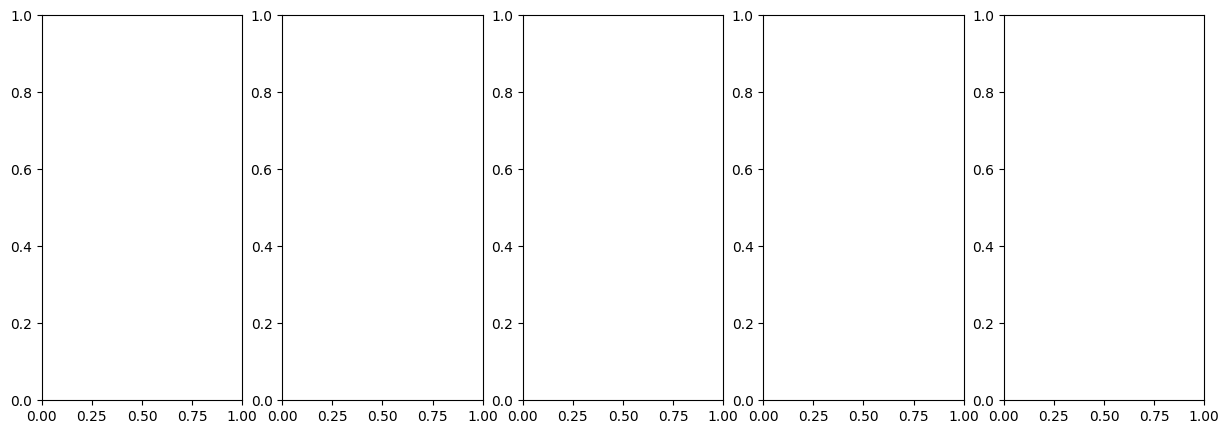

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    img = cv2.imread(images[i])
    axes[i].imshow(img)

Done!